#Blind 75 LeetCode Questions

##***9. Matrix (4 Questions)***

***1. Set Matrix Zeroes***

Given an m x n integer matrix matrix, if an element is 0, set its entire row and column to 0's.

You must do it in place.



Example 1:

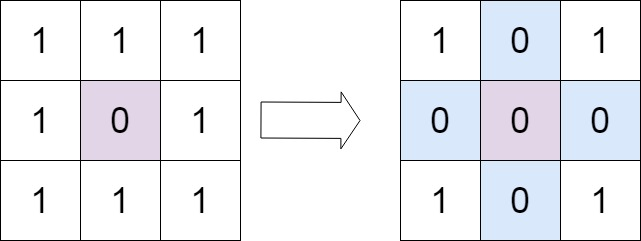

Input: matrix = [[1,1,1],[1,0,1],[1,1,1]]

Output: [[1,0,1],[0,0,0],[1,0,1]]

Example 2:

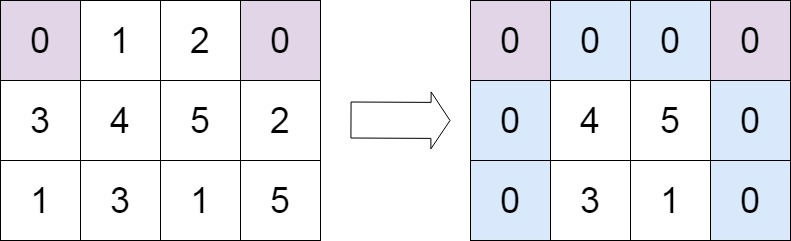

Input: matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]

Output: [[0,0,0,0],[0,4,5,0],[0,3,1,0]]


Constraints:

m == matrix.length
n == matrix[0].length
1 <= m, n <= 200
-231 <= matrix[i][j] <= 231 - 1


Follow up:

A straightforward solution using O(mn) space is probably a bad idea.
A simple improvement uses O(m + n) space, but still not the best solution.
Could you devise a constant space solution?

In [ ]:
from typing import List

class Solution:
  def setZeroes(self, matrix: List[List[int]]) -> None:
    # O(1)
    ROWS, COLS = len(matrix), len(matrix[0])
    rowZero = False

    # Determine which rows/cols need to be zero
    for r in range(ROWS):
      for c in range(COLS):
        if matrix[r][c] == 0:
          matrix[0][c] = 0 # in first row
          if r > 0:
            matrix[r][0] = 0 # starts after 1st row, in first col
          else:
            rowZero = True

      for r in range(1, ROWS):
        for c in range(1, COLS):
          if matrix[0][c] == 0 or matrix[r][0] == 0:
            matrix[r][c] = 0

      if matrix[0][0] == 0:
        for r in range(ROWS):
          matrix[r][0] = 0

      if rowZero:
        for c in range(COLS):
          matrix[0][c] = 0

***2. Spiral Matrix***

Given an m x n matrix, return all elements of the matrix in spiral order.



Example 1:

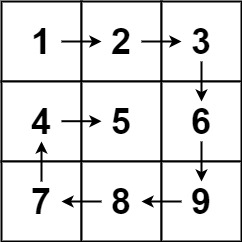

Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [1,2,3,6,9,8,7,4,5]

Example 2:

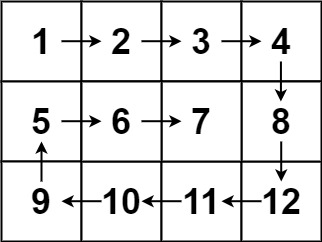

Input: matrix = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

Output: [1,2,3,4,8,12,11,10,9,5,6,7]


Constraints:

m == matrix.length
n == matrix[i].length
1 <= m, n <= 10
-100 <= matrix[i][j] <= 100

In [ ]:
from typing import List

class Solution:
  def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
    res = []
    left, right = 0, len(matrix[0]) # right is set out of bound for easier code
    top, bottom = 0, len(matrix) # same for bottom pointer

    while left < right and top < bottom:
      # get every i in the top row
      for i in range(left, right):
        res.append(matrix[top][i])
      top += 1

      # get every i in the right most col
      for i in range(top, bottom):
        res.append(matrix[i][right - 1])
      right -= 1

      if not (left < right and top < bottom):
        break

      # get every i in the bottom most row
      for i in range(right - 1, left - 1, -1): # from right to left/reverse loop
        res.append(matrix[bottom - 1][i])
      bottom -= 1

      # get every i in the left most col
      for i in range(bottom - 1, top - 1, -1): # bottom to top/reverse loop
        res.append(matrix[i][left])
      left += 1

    return res

***3. Rotate Image***

You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).

You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.



Example 1:

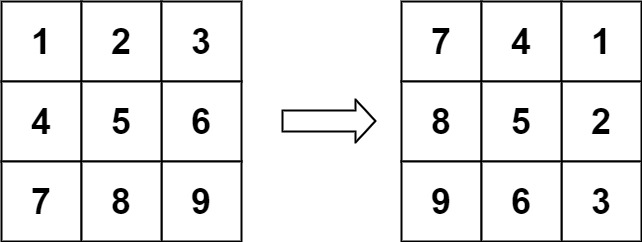

Input: matrix = [[1,2,3],[4,5,6],[7,8,9]]

Output: [[7,4,1],[8,5,2],[9,6,3]]

Example 2:

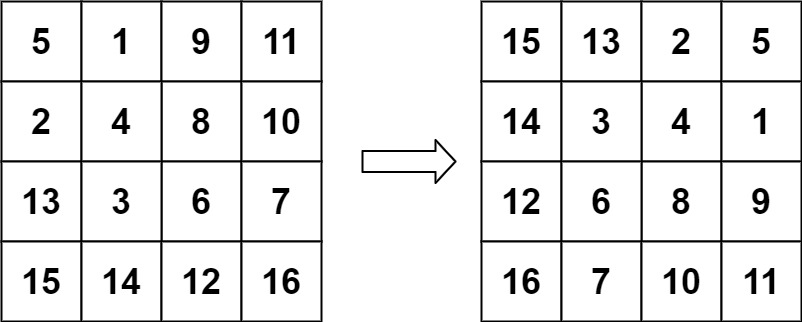

Input: matrix = [[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]]

Output: [[15,13,2,5],[14,3,4,1],[12,6,8,9],[16,7,10,11]]


Constraints:

n == matrix.length == matrix[i].length
1 <= n <= 20
-1000 <= matrix[i][j] <= 1000

In [ ]:
from typing import List

class Solution:
  def rotate(self, matrix: List[List[int]]) -> None:
    l, r = 0, len(matrix) - 1

    while l < r:
      for i in range(r - l):
        top, bottom = l, r # square matrix

        # save the topLeft
        topLeft = matrix[top][l + i]

        # move bottom left into top left
        matrix[top][l + i] = matrix[bottom - i][l]

        # move bottom right into bottom left
        matrix[bottom - i][l] = matrix[bottom][r - i]

        # move top right into bottom right
        matrix[bottom][r - i] = matrix[top + i][r]

        # move top left into top right
        matrix[top + i][r] = topLeft
      r -= 1
      l += 1

***4. Word Search***

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.



Example 1:

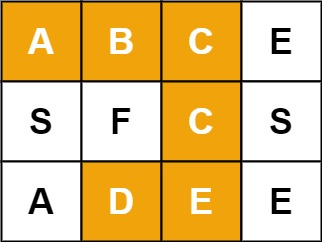

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"

Output: true

Example 2:

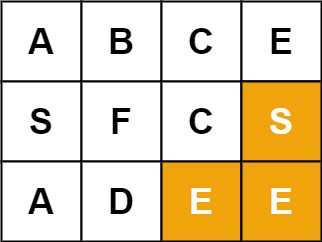

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"

Output: true

Example 3:

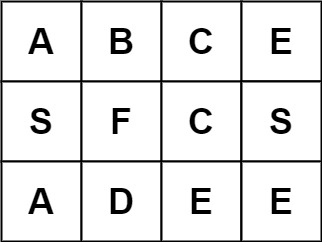

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"

Output: false


Constraints:

m == board.length
n = board[i].length
1 <= m, n <= 6
1 <= word.length <= 15
board and word consists of only lowercase and uppercase English letters.


Follow up: Could you use search pruning to make your solution faster with a larger board?

In [ ]:
from typing import List

class Solution:
  def exist(self, board: List[List[str]], word: str) -> bool:
    ROWS, COLS = len(board), len(board[0])
    path = set()

    def dfs(r, c, i):
      if i == len(word):
        return True
      if (r < 0 or c < 0 or
          r >= ROWS or c >= COLS or
          word[i] != board[r][c] or
          (r, c) in path):
          return False

      path.add((r, c))
      res = (dfs(r + 1, c, i + 1) or
             dfs(r - 1, c, i + 1) or
             dfs(r, c + 1, i + 1) or
             dfs(r, c - 1, i + 1))
      path.remove((r, c))
      return res

    for r in range(ROWS):
      for c in range(COLS):
        if dfs(r, c, 0):
          return True
    return False